## <i>Histogram equalization for image enhanement</i>

<pre>This notebook contains the code for using histogram equalization for image enhancement. 4 Images are used for the experiment.
Comparision is drawn between the code that is written from basics and the built-in function of python for histogram equalization.<pre>

Go to this link to learn more about Histogram equalization: https://www.tutorialspoint.com/dip/histogram_equalization.htm

<pre>Use these commands to download the required libraries for the code:

pip install numpy 
pip install pandas
pip install matplotlib
pip install cv2<pre>

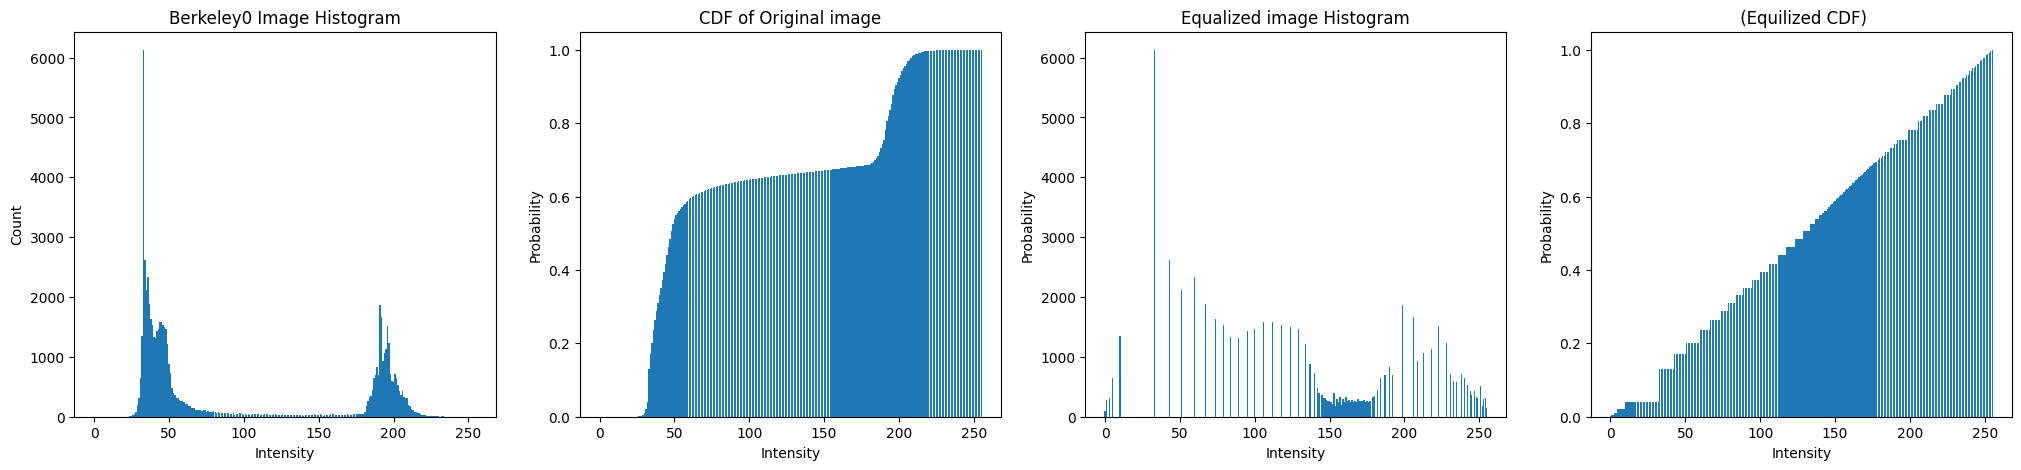

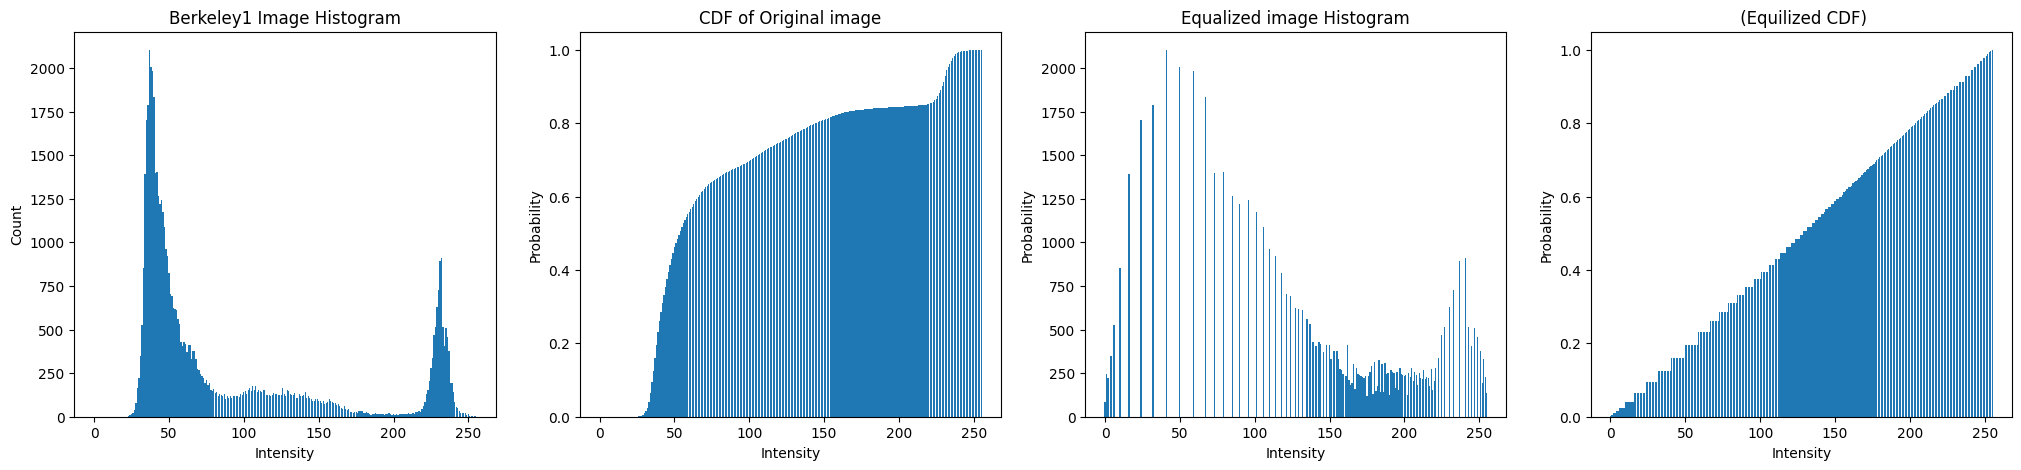

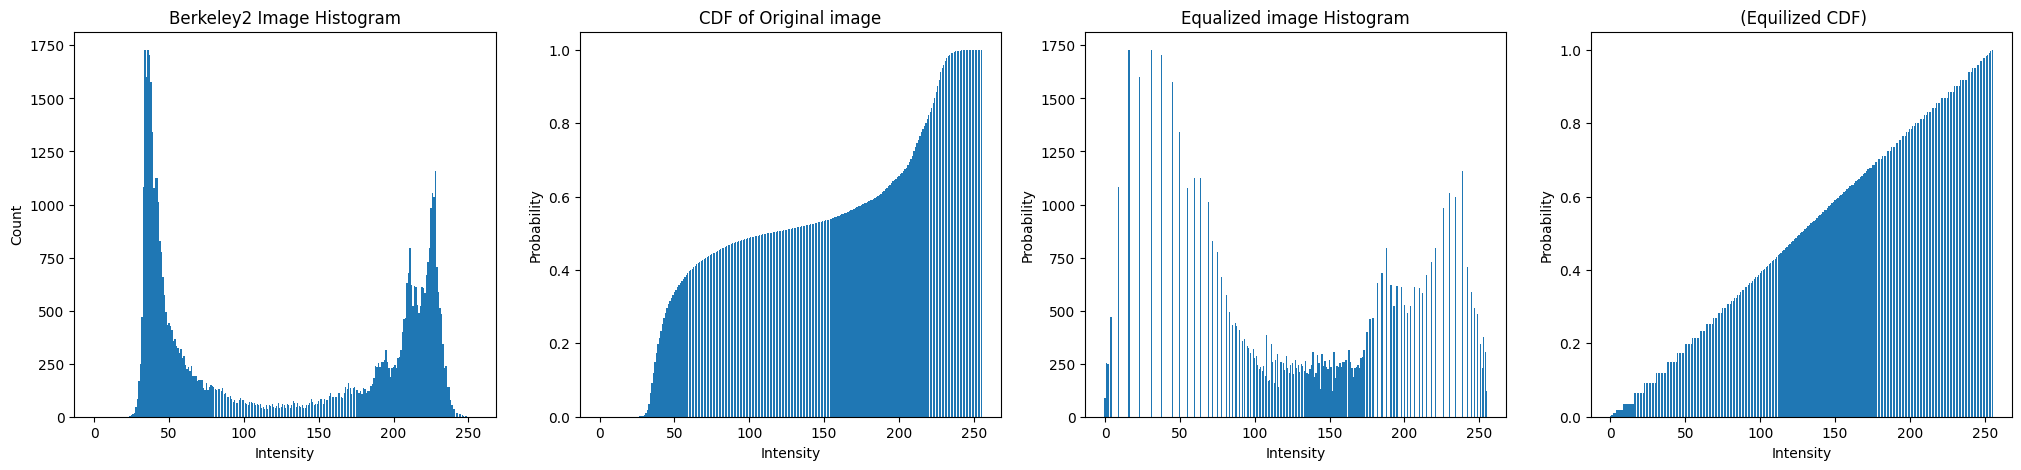

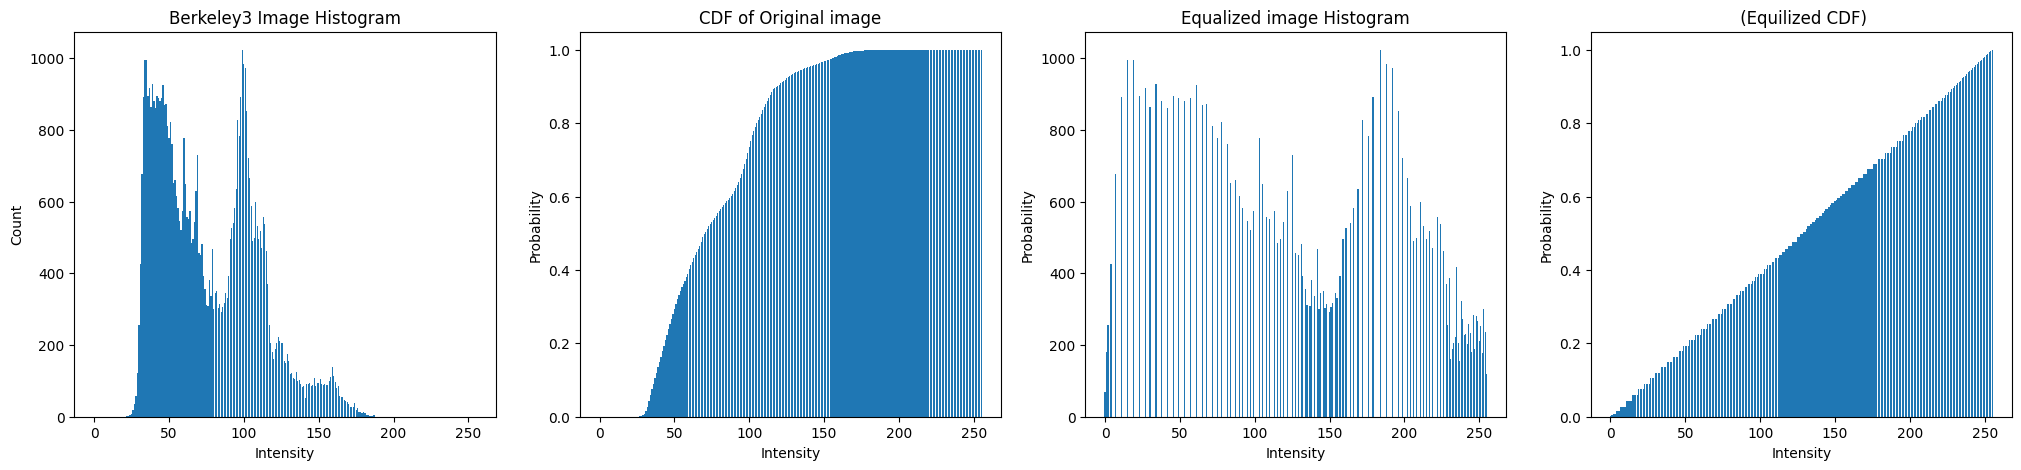

In [1]:

import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt 
import math
import seaborn as sns


#give the image path you want to enhance
img1 = cv.imread("Berkeley1.jpeg", cv.IMREAD_GRAYSCALE)
img2 = cv.imread("Berkeley2.jpeg", cv.IMREAD_GRAYSCALE)
img3 = cv.imread('Berkeley3.jpeg', cv.IMREAD_GRAYSCALE)
img4 = cv.imread('Berkeley4.jpg', cv.IMREAD_GRAYSCALE)


# if you are using only one image, just keep that one image in the list below
ls = [img1,img2,img3,img4] 
img_count = 0

# iterating all the images
for img in ls:
     

    height,width = img.shape

    # checking bits required for the image
    bits = int(2 ** math.ceil(math.log(img.max()) / math.log(2)))

    img_arr = np.zeros(bits)

    count = 0

    for i in range(0,height):
        for j in range(0,width):
            pixel_intensity = 0
            pixel_intensity = img[i, j]
            img_arr[pixel_intensity] = img_arr[pixel_intensity]+1


    

    # Implementation of histogram equalization with basic code

    A = img.size # total number of pixels
    # create a new array which is going to have CDF from zero to that greylevel starting from 0 to 255
    cdf_arr = np.zeros(bits)

    for i in range(0,bits):
        for j in range(0,i+1):
            cdf_arr[i] += img_arr[j] 
        
    
    # normalizing to get final CDF
    norm_cdf = (cdf_arr/A)
    my_norm_cdf = np.round(255*(cdf_arr/A),0)
    equilized_img = my_norm_cdf[img]

    # Plotting equilized image histogram
    equilized_img_arr = np.zeros(bits)

    for i in range(0,height):
        for j in range(0,width):
            pixel_intensity = 0
            pixel_intensity = equilized_img[i, j]
            equilized_img_arr[int(pixel_intensity)] += 1


    eq_cdf_arr = np.zeros(bits)

    for i in range(0,bits):
        for j in range(0,i+1):
            eq_cdf_arr[i] += equilized_img_arr[j]

    eq_norm_cdf = (eq_cdf_arr/A)



    # Display the original and equalized images
    plt.figure(figsize=(25, 5))
    plt.subplot(1, 4, 1)
    # Plot the intensity histogram
    plt.bar(range(256), img_arr)
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.title(f'Berkeley{img_count} Image Histogram')
  
    plt.subplot(1, 4, 2)
    plt.title(f'CDF of Original image')
    plt.xlabel("Intensity")
    plt.ylabel("Probability")
    plt.bar(range(256), norm_cdf)
    #plt.imshow(equalized_img, cmap='gray')

    plt.subplot(1, 4, 3)
    plt.title(f'Equalized image Histogram')
    plt.xlabel("Intensity")
    plt.ylabel("Probability")
    plt.bar(range(256),equilized_img_arr)
    #plt.imshow(equalized_img, cmap='gray')

    plt.subplot(1, 4, 4)
    plt.title(f' (Equilized CDF)')
    plt.xlabel("Intensity")
    plt.ylabel("Probability")
    plt.bar(range(256), eq_norm_cdf)
    #plt.imshow(equalized_img, cmap='gray')



    plt.show()
    img_count += 1


    


Histogram of original image is more densed in intensity range between 10 to 80 which shows that the images would be darker. After performing histogram equalization the range of intensities is diversified and covers whole range from 0 to 256 therefore enhancing the image

In [2]:
# checking the width, height, bit size of images and the maximum intensity available in the image
ls = [img1,img2,img3,img4]
img_count = 0

# iterating all the images
for img in ls:

    height,width = img.shape
    bits = int(2 ** math.ceil(math.log(img.max()) / math.log(2)))
    print(f"height: {height} , width: {width}  bit size: {bits}, max bit of image: {img.max()} \n")

height: 224 , width: 300  bit size: 256, max bit of image: 249 

height: 192 , width: 300  bit size: 256, max bit of image: 255 

height: 200 , width: 300  bit size: 256, max bit of image: 252 

height: 200 , width: 300  bit size: 256, max bit of image: 187 



## Resultant images

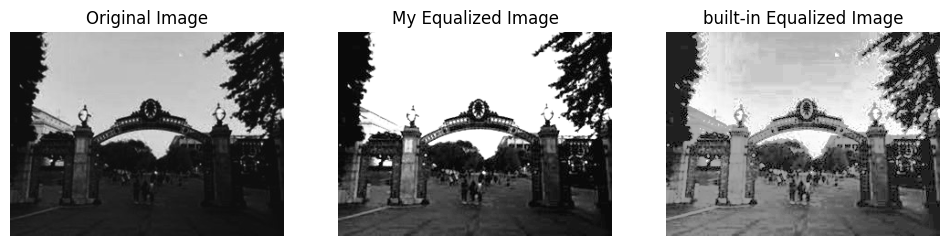

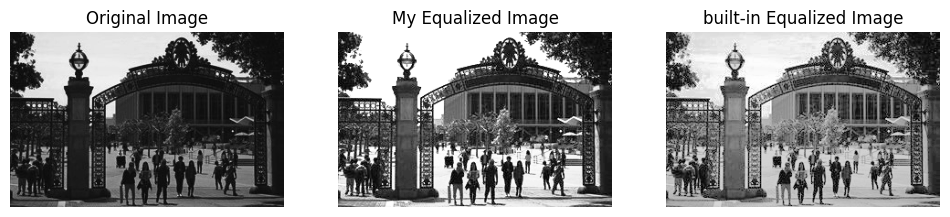

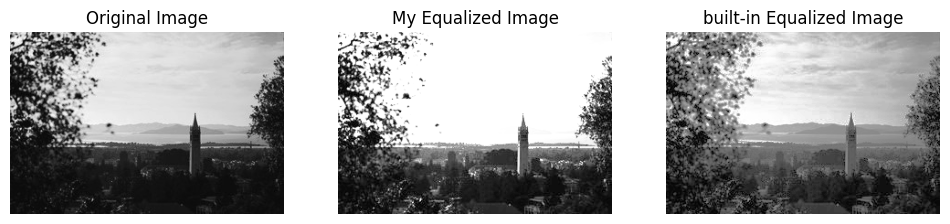

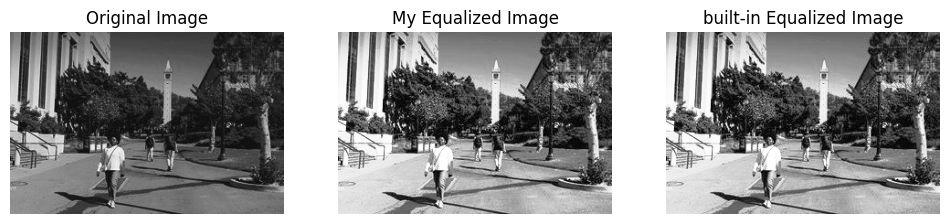

Euclidean distance of Berkeley1 image is 10983
Euclidean distance of Berkeley2 image is 7711
Euclidean distance of Berkeley3 image is 12765
Euclidean distance of Berkeley4 image is 0


In [3]:

import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt 
import math
import seaborn as sns

img1 = cv.imread("Berkeley1.jpeg", cv.IMREAD_GRAYSCALE)
img2= cv.imread("Berkeley2.jpeg", cv.IMREAD_GRAYSCALE)
img3 = cv.imread('Berkeley3.jpeg', cv.IMREAD_GRAYSCALE)
img4 = cv.imread('Berkeley4.jpg', cv.IMREAD_GRAYSCALE)

dist = list()



ls = [img1,img2,img3,img4]

for img in ls:

    height,width = img.shape

    # checking bits required for the image
    bits = int(2 ** math.ceil(math.log(img.max()) / math.log(2)))

    arr = np.zeros(bits)

    count = 0

    for i in range(0,height-1):
        for j in range(0,width-1):

            pixel_intensity = img[i, j]
            arr[pixel_intensity] = arr[pixel_intensity]+1 # adding counts of pixels

    
    A = img.size # total number of pixels
    # create a new array which is going to have CDF from zero to that greylevel starting from 0 to 255
    cdf_arr = np.zeros(bits)

    for i in range(0,bits):
        for j in range(0,i+1):
            cdf_arr[i] = img_arr[j] + cdf_arr[i]
        
    
    # normalizing to get final CDF
    my_norm_cdf =255*(cdf_arr/A)

    
    # Map the original image to the equalized image using the CDF
    my_equalized_img = my_norm_cdf[img]





    # Calculate the histogram using built-in functions
    hist, bins = np.histogram(img.flatten(), bits, [0, bits])
    #print(bins)
   

    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize the CDF
    cdf_norm = (cdf *255) / A

    # Map the original image to the equalized image using the CDF
    built_equalized_img = cdf_norm[img]



    # Display the original and equalized images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('My Equalized Image')
    plt.imshow(my_equalized_img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('built-in Equalized Image')
    plt.imshow(built_equalized_img, cmap='gray')
    plt.axis('off')


    plt.show()

    # euclidean distance is taken as the sum of difference of intensities between built-in equalized image and user-define equalized function
    sum = 0
    for i in range(0,height):
        for j in range(0,width):
            sum += (built_equalized_img[i,j] - my_equalized_img[i,j])**2

    sum = round(math.sqrt(sum))
    dist.append(sum)

# printing the calculated euclidean distance
for i in range(0,len(dist)):
    print(f"Euclidean distance of Berkeley{i+1} image is {dist[i]}")








<pre>                                                 The End